## iii)-5. Implementation of Decision Tree 
This file is the implementation of the Decision Tree. In this section, the group generated their own decision tree, and compare its accuracy with the accuracy of the decision tree generated by Sklearn pakage.



#### iii)-5-A Decision Tree Generated by Sklearn Package 
This section shows the decision tree generated by Sklearn package. The second unit shows the accuracy of the complete tree with all the features, and the third one shows the accuracy of the complete tree with only relevant features.

In [63]:
import pandas as pd 
import numpy as np  
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from operator import itemgetter

In [64]:
%store -r train_x
%store -r test_x
%store -r train_y
%store -r test_y

%store -r train_x_two_features
%store -r test_x_two_features
%store -r train_y_two_features
%store -r test_y_two_features

%store -r transformed_train_x
%store -r transformed_test_x

%store -r lda_train_x
%store -r lda_test_x

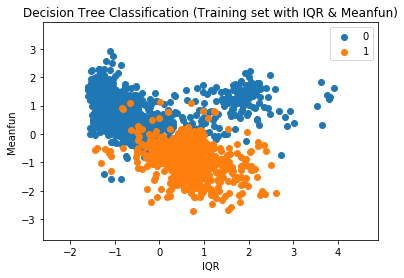

In [65]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier( criterion = 'entropy', random_state = 0)
classifier.fit(train_x_two_features, train_y_two_features)

# Visualising the Training set results with 2 featuers  (IQR and Meanfun)
from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(np.arange(start = train_x_two_features[:, 0].min() - 1, stop = train_x_two_features[:, 0].max() + 1, step = 0.01),
                     np.arange(start = train_x_two_features[:, 1].min() - 1, stop = train_x_two_features[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             cmap = ListedColormap(('white')))

cm = ListedColormap(["#FF0000", "#0000FF"])

for i, j in enumerate(np.unique(train_y_two_features)):
    label= 'male' if j == 0 else 'female'
    plt.scatter(train_x_two_features[train_y_two_features == j, 0], train_x_two_features[train_y_two_features == j, 1], 
                cmap=cm, label = label)
plt.title('Decision Tree Classification (Training set with IQR & Meanfun)')
plt.xlabel('IQR')
plt.ylabel('Meanfun')
plt.legend()
plt.show()


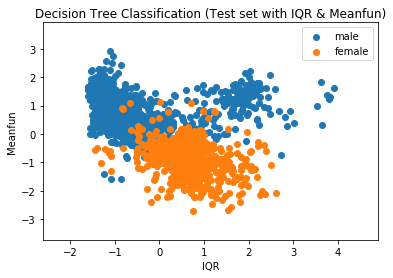

In-Sample Accuracy:100.0000%
Out-of-Sample Accuracy:95.8333%



In [66]:
# Visualising the Test set results with 2 featuers (IQR and Meanfun)
X_set, y_set = train_x_two_features, train_y_two_features
X1, X2 = np.meshgrid(np.arange(start = train_x_two_features[:, 0].min() - 1, stop = train_x_two_features[:, 0].max() + 1, step = 0.01),
                     np.arange(start = train_x_two_features[:, 1].min() - 1, stop = train_x_two_features[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             cmap = ListedColormap(('white')))

cm = ListedColormap(["#FF0000", "#0000FF"])
for i, j in enumerate(np.unique(train_y_two_features)):
    label= 'male' if j == 0 else 'female'
    plt.scatter(train_x_two_features[train_y_two_features == j, 0], train_x_two_features[train_y_two_features == j, 1],
                cmap=cm, label = label)
plt.title('Decision Tree Classification (Test set with IQR & Meanfun)')
plt.xlabel('IQR')
plt.ylabel('Meanfun')
plt.legend()
plt.show()

print('In-Sample Accuracy:{:.4f}%'.format(classifier.score(train_x_two_features, train_y_two_features)*100))
print('Out-of-Sample Accuracy:{:.4f}%\n'.format(classifier.score(test_x_two_features, test_y_two_features)*100))

In [67]:
def run_Decision_tree(train_x, test_x, train_y, test_y):
    error_rate = []
    for i in range(1,21):
        classifier = DecisionTreeClassifier( criterion = 'entropy', max_features =i , random_state = 0)
        classifier.fit(train_x, train_y)
        prediction_y = classifier.predict(test_x)
        error_rate.append(np.mean(prediction_y != test_y))
    plt.plot(range(1,21), error_rate, color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. N Estimators')
    plt.xlabel('N Estimators')
    plt.ylabel('Error Rate')
    plt.show()
    nloc = error_rate.index(min(error_rate))
    print('Lowest error of %s occurs at n=%s.' % (error_rate[nloc], range(1,21)[nloc]))
    prediction_y_train = classifier.predict(train_x)
    print('In-Sample Accuracy:{:.4f}%'.format(classifier.score(train_x, train_y)*100))
    print('Out-of-Sample Accuracy:{:.4f}%\n'.format(classifier.score(test_x, test_y)*100))
    

with all features(Built-in Algorithm):


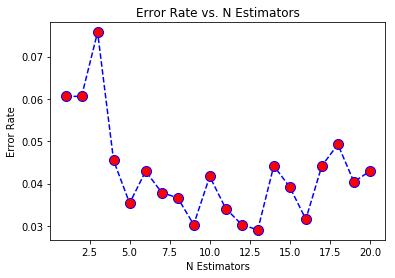

Lowest error of 0.0290404040404 occurs at n=13.
In-Sample Accuracy:100.0000%
Out-of-Sample Accuracy:95.7071%



In [68]:
print("with all features(Built-in Algorithm):")
run_Decision_tree(train_x, test_x, train_y, test_y)